In [1]:
"""
author: 赵杭天 @ SINAP
date: 2019.8.86
"""
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [2]:
# 根据你的计算机性能时间修改采样数,这决定了计算时间(sample_num)
sample_num = 10000*16*4
xx = np.array([random.random()-0.5 for i in range(sample_num)])
yy = np.array([random.choice([1, -1])*np.sqrt(0.5**2-xx[i]**2)*random.random() for i in range(len(xx))])

In [3]:
# 打印前16组点
for i in range(0,16):
    print((xx[i], yy[i]))

(0.2008448897813685, 0.03962637862371878)
(-0.34010471319945634, -0.20119591994657227)
(-0.29679665764259955, -0.0968709610924799)
(0.26836952735581354, 0.3606777356207143)
(0.33039570717006417, -0.018156378167732166)
(0.16342082402698832, -0.40061986749355666)
(0.47242536365121623, -0.014152163902939717)
(0.3808843690325415, 0.1360950737641591)
(0.26678817796624776, 0.09584330358204363)
(-0.4680732558488545, -0.04141602740924838)
(0.22507176615613678, 0.05328757454270317)
(-0.130169666192666, -0.40441729170684665)
(0.06333268541990644, 0.029594204785379472)
(-0.16113789559275216, -0.24295417559694196)
(0.3838365492117176, 0.31486337882682985)
(-0.39362056105191523, 0.07259820049110674)


In [4]:
def is_exist_solve(xx, yy):
    theta = np.arange(0.0,np.pi,0.01)
    p1 = np.array([xx[0],yy[0]])
    p2 = np.array([xx[1],yy[1]])
    p3 = np.array([xx[2],yy[2]])
    p4 = np.array([xx[3],yy[3]])
    for t in theta:
        p0 = np.array([0.5*np.cos(t), 0.5*np.sin(t)])
        # 向量法判定点相对直线的位置
        if (np.cross(p1,p0)>=0. and np.cross(p2,p0)>=0. and  np.cross(p3,p0)>=0. and np.cross(p4,p0)>=0.) or (np.cross(p1,p0)<=0. and np.cross(p2,p0)<=0. and  np.cross(p3,p0)<=0. and np.cross(p4,p0)<=0.):
            return True
    return False

def get_exist_solve(xx, yy):
    theta = np.arange(0.0,np.pi,0.01)
    p1 = np.array([xx[0],yy[0]])
    p2 = np.array([xx[1],yy[1]])
    p3 = np.array([xx[2],yy[2]])
    p4 = np.array([xx[3],yy[3]])
    for t in theta:
        p0 = np.array([0.5*np.cos(t), 0.5*np.sin(t)])
        # 向量法判定点相对直线的位置
        if (np.cross(p1,p0)>=0. and np.cross(p2,p0)>=0. and  np.cross(p3,p0)>=0. and np.cross(p4,p0)>=0.) or (np.cross(p1,p0)<=0. and np.cross(p2,p0)<=0. and  np.cross(p3,p0)<=0. and np.cross(p4,p0)<=0.):
                print('found solution')
                return p0
    print("can't find solution")
    return 0,0

can't find solution


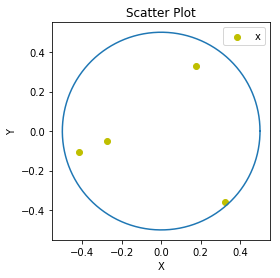

In [5]:
"""算法可视化
可以多次运行本代码块，直观的体验分割直线存在的概率
"""
fig = plt.figure()
ax1 = fig.add_subplot(111)
# 随机取4个点为一组进行测试
rand_s = random.randint(0,(len(xx)-4))
rand_e = rand_s + 4
#设置标题
ax1.set_title('Scatter Plot')
#设置X轴标签
plt.xlabel('X')
#设置Y轴标签
plt.ylabel('Y')
#画散点图
ax1.scatter(xx[rand_s:rand_e],yy[rand_s:rand_e],c = 'y',marker = 'o')
#设置图标
plt.legend('x1')
#画圆
r = 0.5
a, b = (0., 0.)
theta = np.arange(0, 2*np.pi, 0.01)
x = a + r * np.cos(theta)
y = b + r * np.sin(theta)
ax1.plot(x, y)
#找直线
px, py = get_exist_solve(xx[rand_s:rand_e],yy[rand_s:rand_e])
ax1.plot([px, -px],[py, -py ])
ax1.set_aspect(1)


In [6]:
"""并行计算"""
# 划分子任务
def process(xx, yy):
    exist_num = 0
    for i in range(0,len(xx),4):
        if is_exist_solve(xx[i:i+4],yy[i:i+4]):
            exist_num += 1
    return exist_num, i

from multiprocessing import Pool

# 调用的cpu数量
cpu_num = 16

# 保存结果
result = [[0,0] for i in range(cpu_num)]

# 创建进程池并启动计算
print('Parent process %s.' % os.getpid())
p = Pool(cpu_num)
for i in range(cpu_num):
    result[i] = p.apply_async(process, args=(xx[int(len(xx)/cpu_num)*i:int(len(xx)/cpu_num)*(i+1)], yy[int(len(yy)/cpu_num)*i:int(len(xx)/cpu_num)*(i+1)]))
print('Waiting for all subprocesses done...')
p.close()
p.join()
print('All subprocesses done.')

Parent process 18322.
Waiting for all subprocesses done...
All subprocesses done.


In [7]:
# 取回结果
hit = 0
total = 0
for r in result:
    hit += r.get()[0]
    total += r.get()[1]
    
print('final result' ,hit/total*4)

final result 0.49573707370737075
